In [25]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import numpy as numpy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.models as models
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [11]:
def image_convert(tensor):
    """ Display a tensor as an image. """
    
   # image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

tensor([[[[ 0.5193,  0.2282,  0.2796,  ..., -0.6965, -0.7822, -0.6109],
          [ 0.2967,  0.1597,  0.2453,  ..., -0.5253, -0.6794, -0.6109],
          [ 0.1939,  0.1083,  0.2453,  ..., -0.4911, -0.6623, -0.6623],
          ...,
          [ 0.6221,  0.3138,  0.7248,  ...,  0.4679,  0.7591,  1.2214],
          [ 0.5193,  0.4166,  0.5193,  ...,  0.5878,  0.7419,  1.0673],
          [ 0.4851,  0.6392,  0.4508,  ...,  0.8276,  0.4679,  0.7248]],

         [[-0.0224, -0.3200, -0.1975,  ..., -0.7052, -0.8978, -0.7752],
          [-0.2150, -0.3550, -0.2500,  ..., -0.5301, -0.7577, -0.7577],
          [-0.2850, -0.3725, -0.2150,  ..., -0.5126, -0.7227, -0.8102],
          ...,
          [ 0.7829,  0.4153,  0.7304,  ...,  0.2752,  0.5553,  0.9755],
          [ 0.6429,  0.4853,  0.5028,  ...,  0.3627,  0.5203,  0.8179],
          [ 0.6078,  0.7129,  0.4503,  ...,  0.5903,  0.2577,  0.4678]],

         [[-0.3404, -0.6367, -0.5321,  ..., -0.8110, -1.0201, -0.9504],
          [-0.5495, -0.6890, -

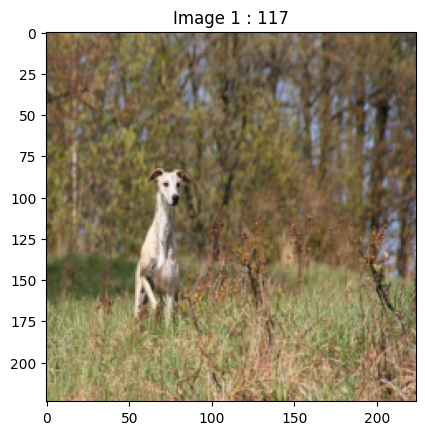

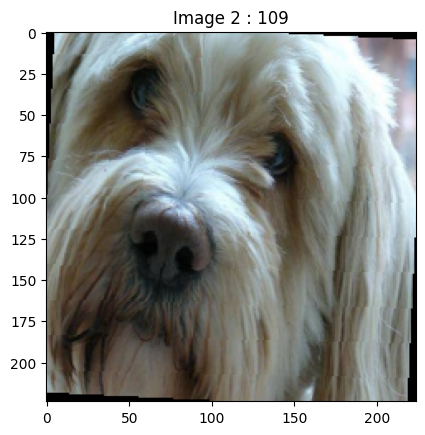

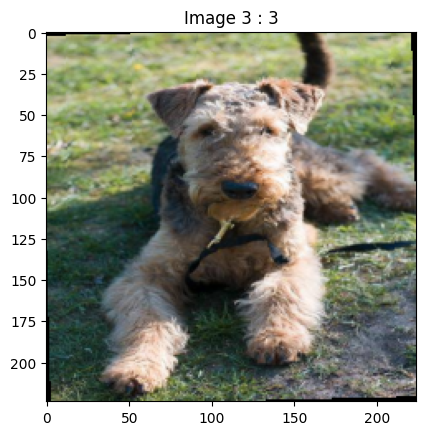

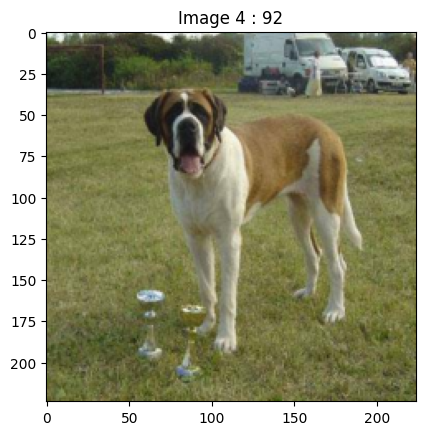

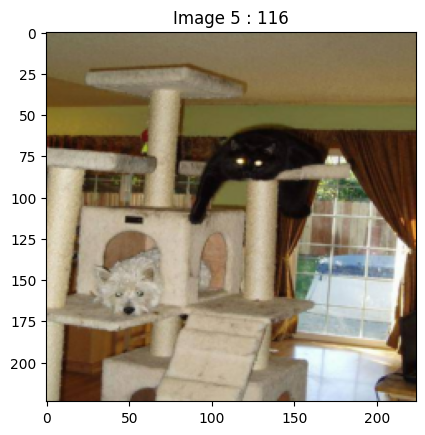

In [24]:
# Define the transformation to be applied to each image
# x=(x-mean)/std
#TODO why
"""Most of the pretrained models require the input to be 224x224 images. Also,
we'll need to match the normalization used when the models were trained.
Each color channel was normalized separately, the means are [0.485, 0.456, 0.406] 
and the standard deviations are [0.229, 0.224, 0.225]."""

transform = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    # transforms.Lambda(lambda x: x * 255.0)
    transforms.CenterCrop((224,224)),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

# Load the images from the folder
dataset = datasets.ImageFolder('./ImageByClasses', transform=transform)

BATCH_SIZE=5
# Create a data loader to load the images in batches
data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Iterate over the data loader to get the tensors
for images, labels in data_loader:
    # Do something with the tensors
    print(images)
    # for image in images:
    #     # print(image_convert(image))
    #     plt.imshow(image_convert(image))
        
    
    # # Convert the tensor to NumPy array
    # images_np = images.numpy()

    # # Iterate through each image in the batch
    for i in range(images_np.shape[0]):
        # Extract the current image from the batch
        current_image = images_np[i, :, :, :]

        # Transpose the dimensions to match the order expected by matplotlib (H x W x C)
        current_image = current_image.transpose(1, 2, 0)

        # Display the image using matplotlib
        plt.imshow(image_convert(images[i]))
        plt.title(f"Image {i + 1} : {labels[i]}")
        plt.show()
    break


In [5]:

# class Dog(nn.Module):
#     def __init__(self,num_classes=120):
#         super(Dog, self).__init__()
#         self.vgg16 = models.vgg16(pretrained=True)  # Cargar el modelo VGG-16 preentrenado
#         # Congelar las capas para que los pesos no se actualicen durante el entrenamiento
#         for param in self.vgg16.parameters():
#             param.requires_grad = False
#         # Modificar la última capa para adaptarse al número de clases
#         in_features = self.vgg16.classifier[6].in_features
#         self.vgg16.classifier[6] = nn.Linear(in_features, num_classes)

#     def forward(self, x):
#         return self.vgg16(x)
num_classes = 120
model = models.vgg16(pretrained=True)  

# Cargar el modelo VGG-16 preentrenado
# Congelar las capas para que los pesos no se actualicen durante el entrenamiento

for param in model.features.parameters():
    param.requires_grad = False

# Modificar la última capa para adaptarse al número de clases
in_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(in_features, num_classes)



c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:

num_epochs = 20
batch_size = 16
learning_rate = 0.005
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(data_loader)

In [ ]:

def train(model, train_dataloader):
    #model.train() #placer le modèle en mode apprentissage
        
    for X,y in train_dataloader:#demarrage de l'apprentissage
        # X,y = X.to(device), y.to(device)
        preds = model(X)
        preds = preds[:, 0]
        erreur = objectif(preds, y )
        erreur.backward()
        sgd.step()            
        sgd.zero_grad()


In [ ]:
def predict(model, val_dataloader):
#     model.eval() #placer le modèle en mode prediction  
    all_preds, all_targets = [], []
    for X,y in val_dataloader:
     #    X,y = X.to(device), y.to(device)
        preds = model(X)
        preds = preds[:, 0]
        all_preds.append( preds )
        all_targets.append( y )
    all_preds   = torch.cat( all_preds )
    all_targets = torch.cat( all_targets )
    return all_preds, all_targets

In [26]:
cv = StratifiedKFold( n_splits=2, shuffle=True, random_state=0 )

In [ ]:
for fold, (train_idx, val_idx) in enumerate(cv.split( X=dataX, y = dataY ) ):
    print('****************  FOLD ', fold, '  *********************')
    trainX = dataX[ train_idx ]
    trainY = dataY[train_idx]
    
    valX = dataX[ val_idx ]
    valY = dataY[val_idx]
    
    
    train_dataset = My_dataset( trainX, trainY ) 
    val_dataset   = My_dataset( valX,   valY ) 

    
    train_dataloader = DataLoader( train_dataset, batch_size=batch_size, shuffle=True  )
    val_dataloader   = DataLoader( val_dataset,   batch_size=batch_size, shuffle=False  )
    
    #model = CNN_NETWORK()
    model  = LSTM_NETWORK()
    model  = model.to(device)
    
    sgd=optim.Adam(model.parameters())
    
    best_erreur = 1e9
    attente    = 0#compte le nombre d'epochs sans diminution de l'erreur
    for epoch in range(2000):        
        train(model, train_dataloader)
        
        all_preds, all_targets = predict(model, val_dataloader)        
        loss        = objectif(all_preds, all_targets)
        all_targets =  all_targets.cpu().detach().numpy()
        all_preds   = all_preds.cpu().detach().numpy()
        all_preds   = all_preds>0.5
        #le NN retourne des probabilités, on considère comme 1 toute probabilité > 0.5
        
        erreur      = 1-metric(all_targets, all_preds) #pourcentage des prédictions incorrectes
        
        #si l'erreur diminue 
        if erreur < best_erreur:
            best_erreur = erreur
            attente = 0 #on réinitialise le compteur d'attente
            
            #on sauvegarde le modèle pour le réutiliser le plus tard
            torch.save( model.state_dict(), './model.bin' )
        else:
            #si l'erreur ne diminue pas, on incrémente le compteur
            attente += 1
            
        if attente>PATIENCE:
            #si le compteur dépasse PATIENCE, on arrete l'apprentissage
            # et on charge le dernier modèle sauvegardé
            model.load_state_dict( torch.load('./model.bin') )
            break
        
        print('epoch :', epoch, 'loss :',loss.item(), erreur)
    
    print('resultat apres fin de l apprentisage :')
    all_preds, all_targets = predict(model, val_dataloader)        
    loss   = objectif(all_preds, all_targets)
    all_targets =  all_targets.cpu().detach().numpy()
    all_preds   = all_preds.cpu().detach().numpy()
    all_preds   = all_preds>0.5
    erreur      = 1-metric(all_targets, all_preds)
    print( 'loss :',loss.item(), erreur)
    
    print()